##  <p dir='rtl'>یادگیری تقویتی - تمرین اول- مفاهیم عمومی یادگیری ماشین</p>
**آقای دکتر فاتح**   
**دستیار آموزشی : عرفان جلیلی**

<p dir='rtl'>
فرض کنیم قرار است که نرم‌افزار موبایلی را طراحی کنیم که قیمت خانه‌ای را با گرفتن اطلاعاتی مانند محله، مساحت، تعداد اتاق …تخمین بزند؛ با استفاده از ابزار‌هایی که یادگیری ماشین در اختیار ما قرار داده است می‌توانیم این کار را انجام دهیم. در این تمرین قرار است که مراحل لازم برای پیاده‌سازی یک مدل یادگیری ماشین را طی کنیم تا مدلی را ارائه دهیم که بتواند قیمت متوسط خانه را با توجه به ویژگی‌های داده شده ( محله، مساحت، تعداد اتاق …) تخمین بزند.
  </p>

<p dir='rtl'> 
 در این تمرین از دیتاست California Housing Price قرار است استفاده کنیم. در ادامه دیتاست را بارگذاری می‌کنیم.
</p>

<font color='green'>
     <p dir='rtl'>
ابتدا سلول زیر را ران کنید تا ماژول‌های مورد نیاز بارگذاری شوند.        
</p>

In [49]:
#@title Import relev‍ant modules
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

###  <p dir='rtl'>  بارگذاری و مشاهده دیتاست   </p> 

In [50]:
training_df = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")

In [51]:
training_df.shape

(17000, 9)

<p dir='rtl'>
    همانطور که در سلول بالا مشاهده می‌شود این دیتا ست از ۱۷۰۰۰ داده تشکیل شده است که هر یک ۹ ویژگی دارد. برای مشاهده  جزییات بیشتر  
    از تابع ()head استفاده می‌کنیم. این تابع ۵ نمونه اول دیتاست را نمایش می‌دهد. در صورتی که می‌خواهید نمونه‌های بیشتری را مشاهده کنین می‌توانید تعداد مورد نظر را به این تابع ورودی دهید. به عنوان مثال: (10)head 
</p>

In [52]:
# Scale the label.
training_df["median_house_value"] /= 1000.0
training_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66.9
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80.1
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85.7
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73.4
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65.5


<p dir='rtl'>
    با مشاهده نمونه‌های بالا می‌توانیم نام هر یک از ویژگی‌های دیتاست را مشاهده کرده. در اینجا قرار است median_house_value را با استفاده از ویژگی‌های دیگر مانند total_bedrooms, total_rooms .. پیش‌بینی کنیم. 
</p>

<font color='red'>
<p dir='rtl'>تکلیف۱: در رابطه با دیتاست جستجو کنید و توضیحی مختصر ارائه دهید. توضیح دهید که ویژگی‌های total_bedrooms و median_house_value  دقیقا چه چیزی را نشان می‌دهند. 
</p>

### Examine the dataset

A large part of most machine learning projects is getting to know your data. The pandas API provides a `describe` function that outputs the following statistics about every column in the DataFrame:

* `count`, which is the number of rows in that column. Ideally, `count` contains the same value for every column. 

* `mean` and `std`, which contain the mean and standard deviation of the values in each column. 

* `min` and `max`, which contain the lowest and highest values in each column.

* `25%`, `50%`, `75%`, which contain various [quantiles](https://developers.google.com/machine-learning/glossary/#quantile).

In [53]:
# Get statistics on the dataset.
training_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207.3
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,116.0
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,15.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119.4
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180.4
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500.0


<font color='red'>
<p dir='rtl'>
    تلکیف۲: در جدول بالا مشخصات آماری ویژگی‌های دیتاست آورده شده است. این جدول را بررسی کنید آیا مقدار max ویژگی total_rooms با مقادیر quantiles هم خوانی دارد؟
</p>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd52ae262d0>,
      dtype=object)

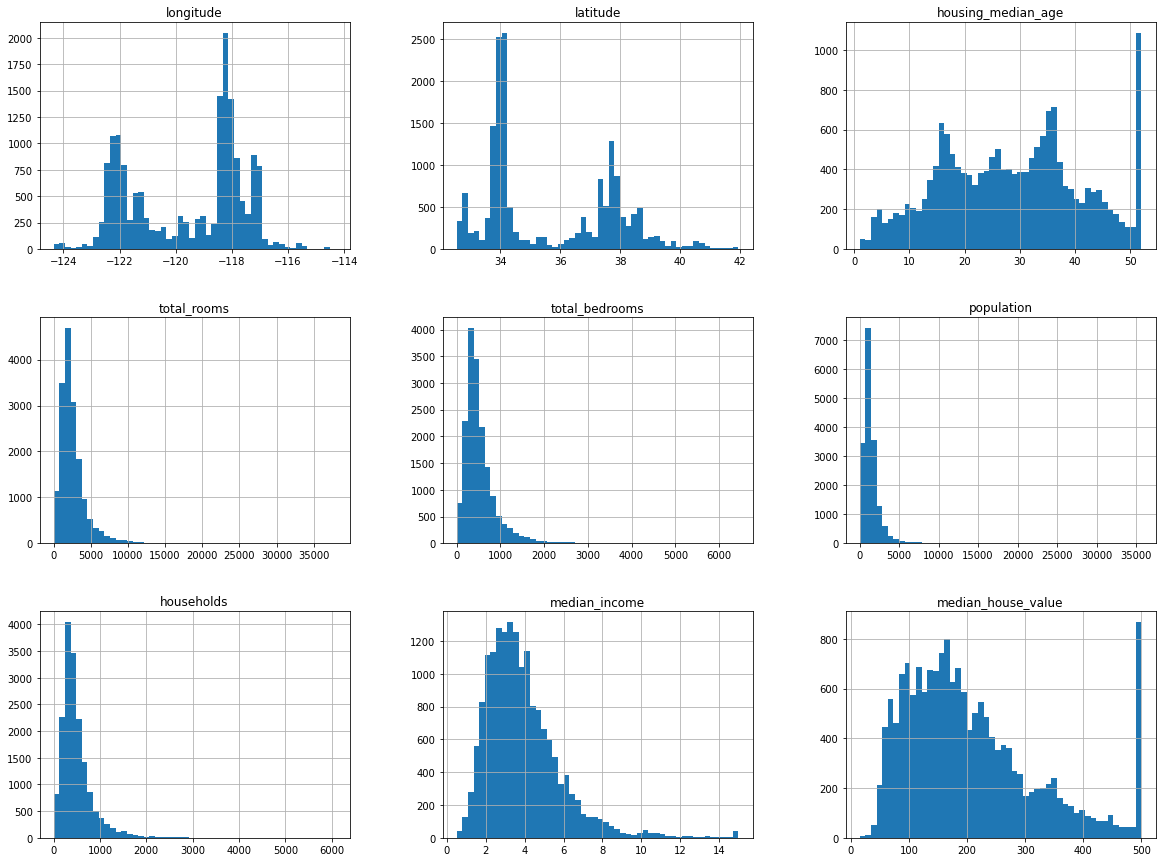

In [54]:
training_df.hist(bins=50, figsize=(20,15))

<p dir='rtl'> <font color='red'>
    تکلیف۳: در بالا هیستوگرام ویژگی‌ها آمده است. نمودار median_income را مختصر تحلیل کنید. به نظر شما درامد‌ها با چه واحدی در دیتاست ثبت شده است؟
</p>

###  Define functions that build and train a model

<p dir='rtl'>
    در این قسمت دو تابع تعریف می‌کنیم. تابع ()build_model که وظیفه ساختن یک مدل رگرسیون خطی با پارامتر‌های رندوم را دارد. دومی تابع ()train_model است که وظیفه آموزش مدل به وسیله‌ی داده‌های آموزش را دارد.
</p>

The following code defines two functions:

  * `build_model(my_learning_rate)`, which builds a randomly-initialized model.
  * `train_model(model, feature, label, epochs)`, which trains the model from the examples (feature and label) you pass. 

<font color='green'>
     <p dir='rtl'>
         تنها cellهای زیر را ران کنید نیاز به تغییری نیست. 
        
</p>

In [55]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer.
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model        


def train_model(model, df, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the model the feature and the label.
  # The model will train for the specified number of epochs. 
  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch
  
  # Isolate the error for each epoch.
  hist = pd.DataFrame(history.history)

  # To track the progression of training, we're going to take a snapshot
  # of the model's root mean squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined the create_model and traing_model functions.")

Defined the create_model and traing_model functions.


### Define plotting functions
<p dir='rtl'>
بر ارزیابی عملکرد مدل نیاز به رسم نمودار برای بررسی راحتتر است. در ادامه توابعی برای رسم نمودار تعریف می‌کنیم.
</p>


<font color='green'>
     <p dir='rtl'>
         تنها cellهای زیر را ران کنید نیاز به تغییری نیست. 
        
</p>

In [56]:
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against 200 random training examples."""

  # Label the axes.
  plt.xlabel(feature)
  plt.ylabel(label)

  # Create a scatter plot from 200 random points of the dataset.
  random_examples = training_df.sample(n=200)
  plt.scatter(random_examples[feature], random_examples[label])

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = 10000
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()


def plot_the_loss_curve(epochs, rmse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()  

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


### Call the model functions
<p dir='rtl'>
یکی از کارهای مهم در یادگیری ماشین این است که کدام ویژگی (feature) با لیبل  (label) همبستگی یا correlation دارد. در واقعیت قیمت یک خانه به صد‌ها ویژگی  مانند: محله، مساحت، تعداد اتاق و غیره بستگی دارد. در ادامه می‌خواهیم مدل را تنها با یک ویژگی   total_rooms آموزش می‌دهیم. می‌خواهیم تست کنیم آیا این ويژگی مناسبی برای تخمین قیمت خانه می‌باشد یا نه!
</p>
<p dir='rtl'>
علاوه بر انتخاب feature مناسب نیاز است که هایپرپارامتر‌های مدل به درستی انتخاب شوند. برای مدل ما هایپرپارامتر‌های learning_rate, epochs و batch_size به صورت پیش فرض مقدار دهی اولیه شده‌اند. فعلا تنها تاثیر feature ها بر دقت مدل را بررسی می‌کنیم اما در ادامه به بررسی این پارامتر‌ها هم خواهیم پرداخت.
 </p>
 
 <p dir='rtl'>
    cell زیر را ران کنید تا مدل با feature و هایپرپارامتر‌های انتخابی آموزش ببیند. نتایج را مشاهده و بررسی کنید.
</p>
 
 

<font color='green'>
     <p dir='rtl'>
         تنها cell زیر را ران کنید و نتایج را مشاهده و بررسی کنید. نیاز به تغییری نیست. 
        
</p>


Epoch 1/30
567/567 [==============================] - 1s 1ms/step - loss: 424338.3662 - root_mean_squared_error: 587.7187
Epoch 2/30
567/567 [==============================] - 1s 1ms/step - loss: 28280.6226 - root_mean_squared_error: 168.1104
Epoch 3/30
567/567 [==============================] - 1s 967us/step - loss: 27556.5375 - root_mean_squared_error: 165.9751
Epoch 4/30
567/567 [==============================] - 1s 959us/step - loss: 26108.3579 - root_mean_squared_error: 161.5545
Epoch 5/30
567/567 [==============================] - 1s 994us/step - loss: 25278.5235 - root_mean_squared_error: 158.9476
Epoch 6/30
567/567 [==============================] - 1s 954us/step - loss: 25344.4861 - root_mean_squared_error: 159.1644
Epoch 7/30
567/567 [==============================] - 1s 981us/step - loss: 24186.0583 - root_mean_squared_error: 155.5052
Epoch 8/30
567/567 [==============================] - 1s 1ms/step - loss: 23966.4935 - root_mean_squared_error: 154.8026
Epoch 9/30
567/567 [=

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


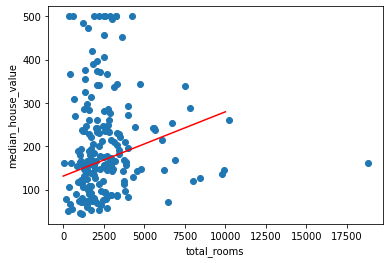

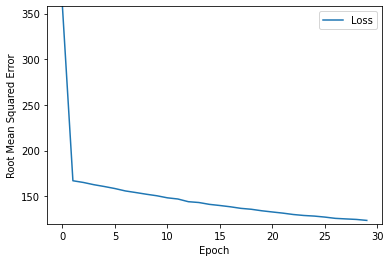

In [57]:
# The following variables are the hyperparameters.
learning_rate = 0.01
epochs = 30
batch_size = 30

# Specify the feature and the label.
my_feature = "total_rooms"  # the total number of rooms on a specific city block.
my_label="median_house_value" # the median value of a house on a specific city block.
# That is, you're going to create a model that predicts house value based 
# solely on total_rooms.  

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df, 
                                         my_feature, my_label,
                                         epochs, batch_size)

print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias )

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

### <p dir='rtl'>تست یا ارزیابی مدل
</p>

<p dir='rtl'>
    تا به اینجا مدل ما توسط یک feature آموزش داده شده است. حال می‌خواهیم از مدل استفاده کنیم و قیمت چند خانه را با آن تخمین بزنیم. برای ارزیابی عملکرد مدل باید آن را با داده‌هایی که توسط مدل دیده‌ نشده‌اند بررسی کرد؛ ولی فعلا در این تمرین از بخشی از داده‌های که در فرآیند آموزش استفاده شده اند استفاده خواهیم کرد.
</p>

<p dir='rtl'>
    ابتدا cell زیر را ران کنید تا تابع تخمین زننده قیمت خانه تعریف شود.
</p>

In [58]:
def predict_house_values(n, feature, label):
  """Predict house values based on a feature."""

  batch = training_df[feature][10000:10000 + n]
  predicted_values = my_model.predict_on_batch(x=batch)

  print("feature   label          predicted")
  print("  value   value          value")
  print("          in thousand$   in thousand$")
  print("--------------------------------------")
  for i in range(n):
    print ("%5.0f %6.0f %15.0f" % (training_df[feature][10000 + i],
                                   training_df[label][10000 + i],
                                   predicted_values[i][0] ))

<p dir='rtl'>
    حال تابع بالا را فراخوانی می‌کنیم تا مدل را با استفاده از ۱۰ نمونه تست ارزیابی کنیم.
</p>

In [59]:
predict_house_values(10, my_feature, my_label)

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
 1960     53             160
 3400     92             182
 3677     69             186
 2202     62             164
 2403     80             167
 5652    295             215
 3318    500             181
 2552    342             169
 1364    118             152
 3468    128             183


<font color='red'>
     <p dir='rtl'> 
    تکلیف ۴- ستون label value مقدار واقعی قیمت خانه و ستون predicted value مقداری است که مدل تخمین زده است. به نظر شما مقدار تخمین زده شده با مقدار واقعی چقدر نزدیک است؟ آیا مدل به درستی قیمت را تخمین میزند؟
    </p>

### <p dir='rtl'> تغییر feature
</p>

<p dir='rtl'>
    با توجه نتایج مرحله‌ی قبل feature یا ویژگی total_rooms ویژگی مناسبی برای تخمین مدل نمی‌باشد. در این قسمت می‌خواهیم feature دیگری را انتخاب کنیم تا دقت مدل را افزایش دهیم. 
</p>


<p dir='rtl'>
    در سلول زیر مقدار feature را از total_rooms به population تغییر دهید. با توجه به تغییر feature شاید نیاز شود که مقدار hyperparameter تغییر دهید.
</p>

<font color='red'>
<p dir='rtl'>
     تکلیف ۵- مقدار feature را به population تغییر دهید. نتایج را بررسی کنید ایا مدل بهبود پیدا کرده است؟ مقدار hyperparameter ها را تغییر دهید و دوباره امتحان کنید. نتایج خود را گزارش کنید.
</p>

170/170 [==============================] - 0s 1ms/step - loss: 79966.5137 - root_mean_squared_error: 273.7911


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


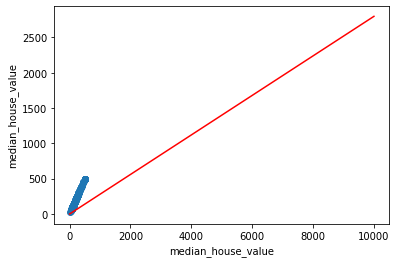

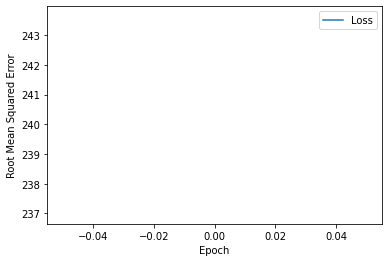

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
   53     53              13
   92     92              24
   69     69              18
   62     62              16
   80     80              21
  295    295              81
  500    500             138
  342    342              94
  118    118              31
  128    128              34
  187    187              51
   80     80              21
  112    112              30
   95     95              25
   69     69              18


In [60]:
my_feature = "median_house_value"   # Replace the ? with population or possibly
                   # a different column name.

# Experiment with the hyperparameters.
learning_rate = 2
epochs = 1
batch_size = 100

# Don't change anything below this line.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df, 
                                         my_feature, my_label,
                                         epochs, batch_size)
plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

predict_house_values(15, my_feature, my_label)

<p dir='rtl'>
</p>

### <p dir='rtl'> تعریف ویژگی مصنوعی (synthetic feature)
</p>

<p dir='rtl'>
    باید متوجه شده باشین که دو feature population و total_rooms نمی‌تواند ویژگی خوبی برای تخمین قیمت خانه باشد؛ حال می‌خواهیم نسبت این دو feature را به عنوان یک feature مصنوعی تعریف کنیم. شاید این feature مصنوعی بتواند ویژگی مناسب‌تری برای مدل ما باشد و دقت  مدل را افزایش دهد.
</p>

<font color='red'>

<p dir='rtl'>
    تکلیف ۶ : یک feature مصنوعی تعریف کنید که نسبت دو ویژگی total_rooms بر population باشد. همچنین هاپرپارامترها را تنظیم کنید و مقدار مناسب را پیدا کنید. دقت مدل را بررسی کنید و نتایج را گزارش کنید.
    
</p>

<font color='green'>

<p dir='rtl'>
        راهنمایی: مقدار پارامتر learning_rate را بین صفر و یک نگه دارید.
</p>

Epoch 1/20
170/170 [==============================] - 0s 946us/step - loss: 22702.5505 - root_mean_squared_error: 145.3986
Epoch 2/20
170/170 [==============================] - 0s 963us/step - loss: 15452.1836 - root_mean_squared_error: 124.2998
Epoch 3/20
170/170 [==============================] - 0s 1ms/step - loss: 15715.2247 - root_mean_squared_error: 125.3305
Epoch 4/20
170/170 [==============================] - 0s 868us/step - loss: 15849.3760 - root_mean_squared_error: 125.8893
Epoch 5/20
170/170 [==============================] - 0s 1ms/step - loss: 15988.8077 - root_mean_squared_error: 126.4429
Epoch 6/20
170/170 [==============================] - 0s 886us/step - loss: 16048.9933 - root_mean_squared_error: 126.6757
Epoch 7/20
170/170 [==============================] - 0s 959us/step - loss: 16119.0369 - root_mean_squared_error: 126.9460
Epoch 8/20
170/170 [==============================] - 0s 987us/step - loss: 15713.0297 - root_mean_squared_error: 125.3304
Epoch 9/20
170/170 [

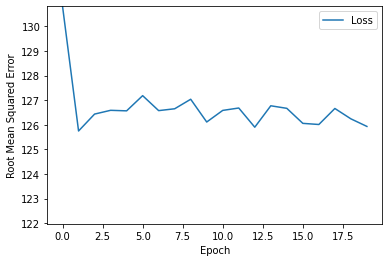

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
  200     53             236
  200     92             236
  200     69             236
  200     62             236
  200     80             236
  200    295             236
  200    500             236
  200    342             236
  200    118             236
  200    128             236
  200    187             236
  200     80             236
  200    112             236
  200     95             236
  200     69             236


In [67]:
# Define a synthetic feature named rooms_per_person
training_df["rooms_per_person"] = 200 # write your code here.

# Don't change the next line.
my_feature = "rooms_per_person"

# Assign values to these three hyperparameters.
learning_rate = 0.5
epochs = 20
batch_size = 100

# Don't change anything below this line.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df,
                                         my_feature, my_label,
                                         epochs, batch_size)

plot_the_loss_curve(epochs, rmse)
predict_house_values(15, my_feature, my_label)

### <p dir='rtl'> ماتریس همبستگی
</p>

<p dir='rtl'>
    تا به اینجا با آزمون و خطا سعی کردیم  یک ویژگی انتخاب کنیم که دقت مدل را افزایش دهد. حال می‌خواهیم با استفاده از correlation matrix یا ماتریس همبستگی feature مناسب را گزینش کنیم.
</p>

<font color='red'>

<p dir='rtl'>
    تکلیف ۷: ماتریس correlation را تعریف کنید. مقادیر این ماتریس در چه بازه‌ای هستند و چه چیزی را نشان می‌دهند؟    
</p>

<font color='green'>

<p dir='rtl'>
    با اجرای cell زیر correlation matrix خروجی داده می‌شود.
</p>

In [62]:
# Generate a correlation matrix.
training_df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.0,-0.9,-0.1,0.0,0.1,0.1,0.1,-0.0,-0.0
latitude,-0.9,1.0,0.0,-0.0,-0.1,-0.1,-0.1,-0.1,-0.1
housing_median_age,-0.1,0.0,1.0,-0.4,-0.3,-0.3,-0.3,-0.1,0.1
total_rooms,0.0,-0.0,-0.4,1.0,0.9,0.9,0.9,0.2,0.1
total_bedrooms,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,-0.0,0.0
population,0.1,-0.1,-0.3,0.9,0.9,1.0,0.9,-0.0,-0.0
households,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,0.0,0.1
median_income,-0.0,-0.1,-0.1,0.2,-0.0,-0.0,0.0,1.0,0.7
median_house_value,-0.0,-0.1,0.1,0.1,0.0,-0.0,0.1,0.7,1.0


<font color='red'>
<p dir='rtl'>
    تکلیف ۸ - بررسی کنید کدام یک از feature ها می‌تواند گزینه‌ی خوبی برای مدل باشد. دلیل خودتان را گزارش دهید.
</p>


<p dir='rtl'>
    در این تمرین ابتدا سعی کردیم دیتاست را مشاهده کنیم تا به دید جامع‌تری دست پیدا کنیم. همچنین مدلی را تعریف کردیم و سعی داشتیم با استفاده از آزمون خطا ویژگی مناسبی را پیدا کنیم تا دقت مدل را افزایش دهیم. همچنین هایپرپارامترها را فراموش نکردیم و آن‌ها را با تغییر ویژگی، مجددا تنظیم کردیم. در ادامه به جای آزمون و خطا به یک روش آماری رجوع کردیم و ماتریس همبستگی را تشکیل دادیم تا ویژگی‌های مناسب را پیدا کنیم؛ اما باید بدانیم که این ماتریس همه چیز را درباره مدل و وابستگی‌های آن به ما نمی‌گوید. برای بالا بردن دقت مدل گاه مجبور هستیم کار‌های مختلفی انجام دهیم؛ انتخاب ویژگی مناسب و تنظیم هایپر پارامتر‌ها را در دقت مدل بررسی کردیم. همچنین انتخاب مدل‌های مناسب و پیش‌پردازش‌های گوناگون بر روی دیتاست شاید ما را به مدلی بهتر سوق دهد. بعضی مواقع می‌توانیم با اتکا به ریاضیات و آمار دقت مدل را افزایش دهیم گاه نیاز است که آزمون و خطا را پیش بگیریم تا  هایپرپارامترها را تنظیم کنیم. 
</p>

<p dir='rtl'>
    پایان - موفق باشین
</p>